# ALYRA - MACHINE LEARNING - TRANSFORMATION DES DONNÉES

**Ce Notebook reprend l'ensemble des méthodes de tranformations des données en vue d'un projet IA.**  
  
### Rappel - les étapes d'un projet IA :  
1. Collecte de données
2. Nettoyage et Exploration des données
3. Choix du Modèle
4. Création du Modèle
5. Deploiement du Modèle

**Ici nous nous concentrons sur l'étape 2 - notamment la partie Transformation des données.**

### Transformation
- Imputation
- Encodage (Encoder)
- Normalisation et Mise à l'échelle (Scaler)
- Discrétisation des variables continues (Discretizer)
- Création de variables dérivées (Features Engineering)


## Setup Librairies

In [34]:
import pandas as pd
import numpy as np
import sklearn

## Imputation

### Simple Imputer - Numerical Data

In [35]:
from sklearn.impute import SimpleImputer
X = pd.DataFrame([[np.nan, 2], [6, np.nan], [7, 6]])
X

,0,1
0,NaN,2.0
1,6.0,NaN
2,7.0,6.0


In [36]:
# creation de min imputer par strategy :  mean ou median
imp = SimpleImputer(missing_values=np.nan, strategy='mean') # strategy='median'
imp.fit(X)

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [37]:
pd.DataFrame(imp.transform(X))

,0,1
0,6.5,2.0
1,6.0,4.0
2,7.0,6.0


In [38]:
Xt = pd.DataFrame([[1, 2], [np.nan, 3], [7, 6]])
Xt

,0,1
0,1.0,2
1,NaN,3
2,7.0,6


In [39]:
pd.DataFrame(imp.transform(Xt))

,0,1
0,1.0,2.0
1,6.5,3.0
2,7.0,6.0


### Simple Imputer - Categorical Data

In [40]:
df = pd.DataFrame([["a", "x"],
                   [np.nan, "y"],
                   ["a", np.nan],
                   ["b", "y"]], dtype="category")
df

,0,1
0,a,x
1,NaN,y
2,a,NaN
3,b,y


In [41]:
imp = SimpleImputer(strategy="most_frequent")
pd.DataFrame(imp.fit_transform(df))

,0,1
0,a,x
1,a,y
2,a,y
3,b,y


### KNN Imputer

In [42]:
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]

In [43]:
pd.DataFrame(X)

,0,1,2
0,1.0,2,NaN
1,3.0,4,3.0
2,NaN,6,5.0
3,8.0,8,7.0


In [44]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")

In [45]:
pd.DataFrame(imputer.fit_transform(X))

,0,1,2
0,1.0,2.0,4.0
1,3.0,4.0,3.0
2,5.5,6.0,5.0
3,8.0,8.0,7.0


## Encoder

### Label Encoder

In [46]:
from sklearn.preprocessing import LabelEncoder

d = ["jk", "ad", "ed", "fhfh"]

le = LabelEncoder()
le.fit(d)

LabelEncoder()

In [47]:
pd.DataFrame([le.classes_])

,0,1,2,3
0,ad,ed,fhfh,jk


In [48]:
le.transform(d)

array([3, 0, 1, 2])

In [49]:
le.inverse_transform([0, 0, 1, 2])

array(['ad', 'ad', 'ed', 'fhfh'], dtype='<U4')

### One Hot Encoder

In [50]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

data = [['Male', 1], ['Female', 3], ['Female', 2]]
X = pd.DataFrame(data,columns=['gender', 'group'])
display(X)

,gender,group
0,Male,1
1,Female,3
2,Female,2


In [51]:
len(np.unique(X["gender"]))

2

In [52]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
print(enc.categories_)

[array(['Female', 'Male'], dtype=object), array([1, 2, 3])]


In [53]:
oh_columns = enc.get_feature_names_out(['gender', 'group'])
display(oh_columns)

array(['gender_Female', 'gender_Male', 'group_1', 'group_2', 'group_3'],
      dtype=object)

In [54]:
X_test = pd.DataFrame([['Female', 3], ['Male', 8]], columns=['gender', 'group'])
X_test

,gender,group
0,Female,3
1,Male,8


In [55]:
X_test_encoded = pd.DataFrame(enc.transform(X_test).toarray(), columns=oh_columns)
X_test_encoded

,gender_Female,gender_Male,group_1,group_2,group_3
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0


In [56]:
Xt = pd.DataFrame([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]], columns=oh_columns)
Xt

,gender_Female,gender_Male,group_1,group_2,group_3
0,0,1,1,0,0
1,0,0,0,1,0


In [57]:
pd.DataFrame(enc.inverse_transform(Xt), columns=['gender', 'group'])

,gender,group
0,Male,1
1,None,2


### Ordinal Encoder

In [58]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = [['Male', 1], ['Female', 3], ['Female', 2]]
display(pd.DataFrame(X))

,0,1
0,Male,1
1,Female,3
2,Female,2


In [59]:
enc.fit(X)
print(enc.categories_)
display(pd.DataFrame(enc.transform(X)))

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]


,0,1
0,1.0,0.0
1,0.0,2.0
2,0.0,1.0


In [60]:
Xt = [[1, 0], [0, 1]]
display(pd.DataFrame(Xt))
display(pd.DataFrame(enc.inverse_transform(Xt)))

,0,1
0,1,0
1,0,1


,0,1
0,Male,1
1,Female,2


## Scaler

### Compréhension Générale

#### Scaling

In [61]:
import numpy as np, pandas as pd

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

ModuleNotFoundError: No module named 'mlxtend'

#### Normalisation

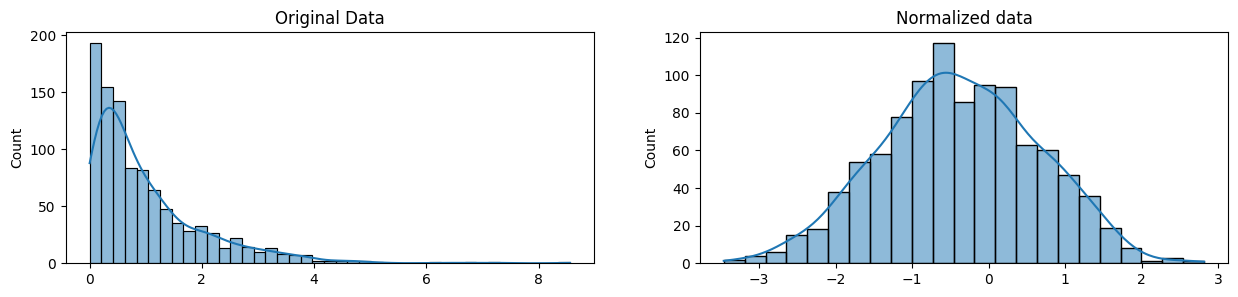

In [ ]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

### Max Abs scaler

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
pd.DataFrame(X)

In [ ]:
transformer = MaxAbsScaler().fit(X)
Xt = transformer.transform(X)
pd.DataFrame(Xt)

### Min MAx Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
pd.DataFrame(data)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(data)
print(scaler.data_max_)

In [ ]:
pd.DataFrame(scaler.transform(data))

### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
display(pd.DataFrame(data))
scaler = StandardScaler()

In [ ]:
scaler.fit(data)
print(scaler.mean_)

In [ ]:
pd.DataFrame(scaler.transform(data))

In [ ]:
print(scaler.transform([[2, 2]]))

## Discretizer

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
X = [[-2, 1, -4,   -1],
     [-1, 2, -3, -0.5],
     [ 0, 3, -2,  0.5],
     [ 1, 4, -1,    2]]
pd.DataFrame(X)

,0,1,2,3
0,-2,1,-4,-1.0
1,-1,2,-3,-0.5
2,0,3,-2,0.5
3,1,4,-1,2.0


In [ ]:
est = KBinsDiscretizer(
    n_bins=3, encode='ordinal', strategy='uniform', subsample=None
)
est.fit(X)

Xt = est.transform(X)
pd.DataFrame(Xt)

,0,1,2,3
0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0
2,2.0,2.0,2.0,1.0
3,2.0,2.0,2.0,2.0


## Etapes Complètes

## Préparation des données Brut

### Setup Data

Mettre les données dans son drive - dans un dossier ./Data  
On va prendre comme exemple les données "Housing de Melbourne" du fichier melb.csv




In [ ]:
def import_csv_data_from_google(data_url:str):
    return 'https://drive.google.com/uc?id=' + data_url.split('/')[-2]

In [ ]:
import pandas as pd
import os

# Collecte des données
melb_data = import_csv_data_from_google('https://drive.google.com/file/d/1bAw79m7DD1On2nicR1vG9MkmLpyNadLI/view?usp=drive_link')

In [ ]:
# Read the data
data = pd.read_csv(melb_data)
data.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


In [ ]:
print(type(data))
len(data.columns)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude   

### Séparation Features et Label

In [ ]:
y = data['Price']
X = data.drop(['Price'], axis=1)

In [ ]:
print(f"moyenne des prix : {y.mean()}")

moyenne des prix : 1075684.079455081


In [ ]:
X.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

### Récupération Colonnes Numeriques et Categorielles

In [64]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
numerical_cols

['Rooms',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [ ]:
X_train.head()

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
12167,u,S,Southern Metropolitan,1,5.0,3182.0,1.0,1.0,1.0,0.0,NaN,1940.0,-37.85984,144.9867,13240.0
6524,h,SA,Western Metropolitan,2,8.0,3016.0,2.0,2.0,1.0,193.0,NaN,NaN,-37.85800,144.9005,6380.0
8413,h,S,Western Metropolitan,3,12.6,3020.0,3.0,1.0,1.0,555.0,NaN,NaN,-37.79880,144.8220,3755.0
2919,u,SP,Northern Metropolitan,3,13.0,3046.0,3.0,1.0,1.0,265.0,NaN,1995.0,-37.70830,144.9158,8870.0
6043,h,S,Western Metropolitan,3,13.3,3020.0,3.0,1.0,2.0,673.0,673.0,1970.0,-37.76230,144.8272,4217.0


## Pipeline

### Pipeline de Transformation

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
t = pd.DataFrame(preprocessor.fit_transform(X_train)).head()

In [ ]:
t

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,5.0,3182.0,1.0,1.0,1.0,0.0,153.764119,1940.000000,-37.85984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,8.0,3016.0,2.0,2.0,1.0,193.0,153.764119,1964.839866,-37.85800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,12.6,3020.0,3.0,1.0,1.0,555.0,153.764119,1964.839866,-37.79880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,13.0,3046.0,3.0,1.0,1.0,265.0,153.764119,1995.000000,-37.70830,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,13.3,3020.0,3.0,1.0,2.0,673.0,673.000000,1970.000000,-37.76230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
12167,u,S,Southern Metropolitan,1,5.0,3182.0,1.0,1.0,1.0,0.0,NaN,1940.0,-37.85984,144.98670,13240.0
6524,h,SA,Western Metropolitan,2,8.0,3016.0,2.0,2.0,1.0,193.0,NaN,NaN,-37.85800,144.90050,6380.0
8413,h,S,Western Metropolitan,3,12.6,3020.0,3.0,1.0,1.0,555.0,NaN,NaN,-37.79880,144.82200,3755.0
2919,u,SP,Northern Metropolitan,3,13.0,3046.0,3.0,1.0,1.0,265.0,NaN,1995.0,-37.70830,144.91580,8870.0
6043,h,S,Western Metropolitan,3,13.3,3020.0,3.0,1.0,2.0,673.0,673.0,1970.0,-37.76230,144.82720,4217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,h,SP,Northern Metropolitan,3,5.2,3056.0,3.0,1.0,2.0,212.0,NaN,NaN,-37.77695,144.95785,11918.0
3264,h,S,Eastern Metropolitan,3,10.5,3081.0,3.0,1.0,1.0,748.0,101.0,1950.0,-37.74160,145.04810,2947.0
9845,h,PI,Northern Metropolitan,4,6.7,3058.0,4.0,2.0,2.0,441.0,255.0,2002.0,-37.73572,144.97256,11204.0
10799,h,S,Northern Metropolitan,3,12.0,3073.0,3.0,1.0,1.0,606.0,NaN,NaN,-37.72057,145.02615,21650.0


### Définir le modèle

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0)


### Création du pipeline complet

In [ ]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(
    steps=[
            ('preprocessor', preprocessor),
            ('model', model)
    ]
)

### Run du pipeline

In [ ]:
type(y_valid.values)

numpy.ndarray

In [ ]:
# Preprocessing of training data, fit model
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

ValueError: Specifying the columns using strings is only supported for dataframes.

### Exemple Pipeline DataPrep - Model

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X, y = make_classification(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

# The pipeline can be used as any other estimator and avoids leaking the test set into the train set
pipe.fit(X_train, y_train).score(X_test, y_test)

0.88

In [ ]:
# An estimator's parameter can be set using '__' syntax
pipe.set_params(svc__C=10).fit(X_train, y_train).score(X_test, y_test)

0.76